# To Perform And Analysis Of Logistic Regression Algorithm

# Importing The Libraries

In [1]:
#Exp no.:8

In [2]:
#Aim : Understanding Logistic Regression Algorithm

In [3]:
#Name:Yashraj Dipak Gawande
#Roll no.:18
#Section:3B
#Subject:DSS
#Date:18/09/2025

In [4]:
import pandas as pd 
import numpy as np

# Data Acquisition using Pandas 

In [5]:
import os

In [6]:
os.getcwd()

'C:\\Users\\user\\DSS EXP files'

In [7]:
os.chdir('C:\\Users\\user\\Desktop')

In [8]:
data=pd.read_csv("heart.csv")

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.shape

(1025, 14)

In [14]:
data.size

14350

In [15]:
data.ndim

2

# Data preprocessing _ data cleaning _ missing value treatment

In [16]:
# check Missing Value by record 

data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isna().any()


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [18]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Independent and Dependent Variables


In [19]:
x=data.drop("target", axis=1)
y=data["target"]

# Splitting of DataSet into train and Test¶

In [20]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

# Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression()
log = LogisticRegression(max_iter=1000)  # Increase to 1000 or more
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred1 = log.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score 

In [25]:
accuracy_score (y_test,y_pred1)

0.7951219512195122

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, y_pred1)

In [28]:
labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

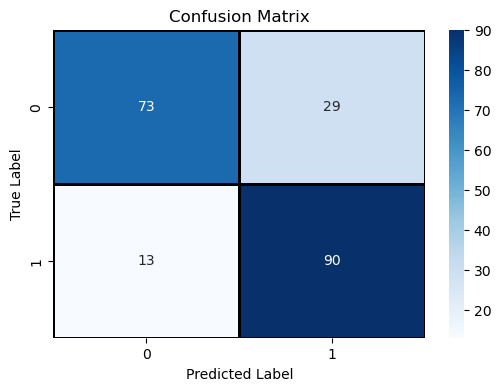

In [29]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

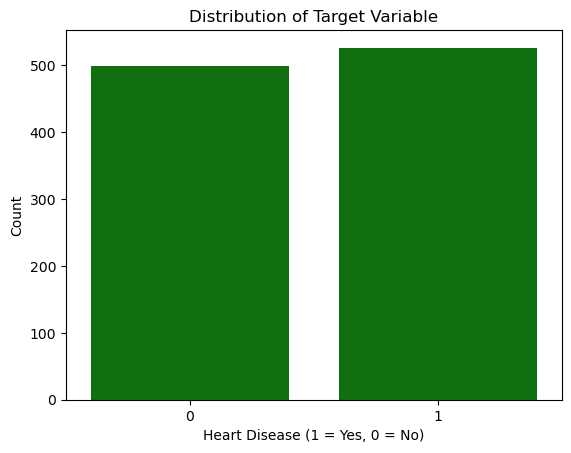

In [38]:
sns.countplot(x='target', data=data, color='green')
plt.title("Distribution of Target Variable")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Conclusion :
                The experiment effectively implemented and analyzed the Logistic Regression algorithm, demonstrating its suitability for binary classification problems. The results highlighted its efficiency in modeling relationships between input features and categorical outcomes.  